In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append("../")

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import math


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

# Importar nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_clustering as sc

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
# abrimos el conjunto de datos
df = pd.read_csv("../datos/datos_prepro.csv", index_col=0)
df.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,10.098283,1.333333,0.0,20.454890,42.389194,0.076662
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,16.452253,2.000000,0.5,-8.095762,41.934066,0.076662
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,23.105962,2.000000,0.5,24.741402,41.561355,0.573855
3,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,12.744104,0.666667,0.5,-2.873676,41.317308,0.573855
4,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,12.473784,1.666667,0.0,8.211899,40.991300,0.076662


In [3]:
# instanciamos la clase de clustering porque tenemos otro conjunto de datos
modelos = sc.Clustering(df)

# llamamos al método de dbscan
df_dbscan = modelos.modelo_dbscan(dataframe_original=df)
df_dbscan.head()

eps: 0.5, min_samples: 3, silhouette: -0.40702197259536527
eps: 0.5, min_samples: 2, silhouette: -0.42452157127774026
eps: 0.5, min_samples: 1, silhouette: -0.3570073400404022
eps: 1.0, min_samples: 3, silhouette: 0.14477177270396327
eps: 1.0, min_samples: 2, silhouette: 0.11630333403867589
eps: 1.0, min_samples: 1, silhouette: -0.06274260575757072
eps: 1.5, min_samples: 3, silhouette: 0.5214905541575057
eps: 1.5, min_samples: 2, silhouette: 0.4504499642770092
eps: 1.5, min_samples: 1, silhouette: 0.2710676969200265


,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_dbscan
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,10.098283,1.333333,0.0,20.454890,42.389194,0.076662,-1
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,16.452253,2.000000,0.5,-8.095762,41.934066,0.076662,-1
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,23.105962,2.000000,0.5,24.741402,41.561355,0.573855,-1
3,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,12.744104,0.666667,0.5,-2.873676,41.317308,0.573855,-1
4,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,12.473784,1.666667,0.0,8.211899,40.991300,0.076662,-1


In [4]:
df['clusters_dbscan'].unique()

array([-1,  1,  0,  3,  2,  4,  7,  5,  6, 11,  8,  9, 10, 12, 16, 13, 17,
       14, 15, 20, 18, 19, 23, 22, 21, 25, 24, 27, 26, 29, 28, 30, 32, 31,
       35, 34, 33, 36, 37, 38, 39, 40, 41, 42, 44, 43, 45, 46, 47])

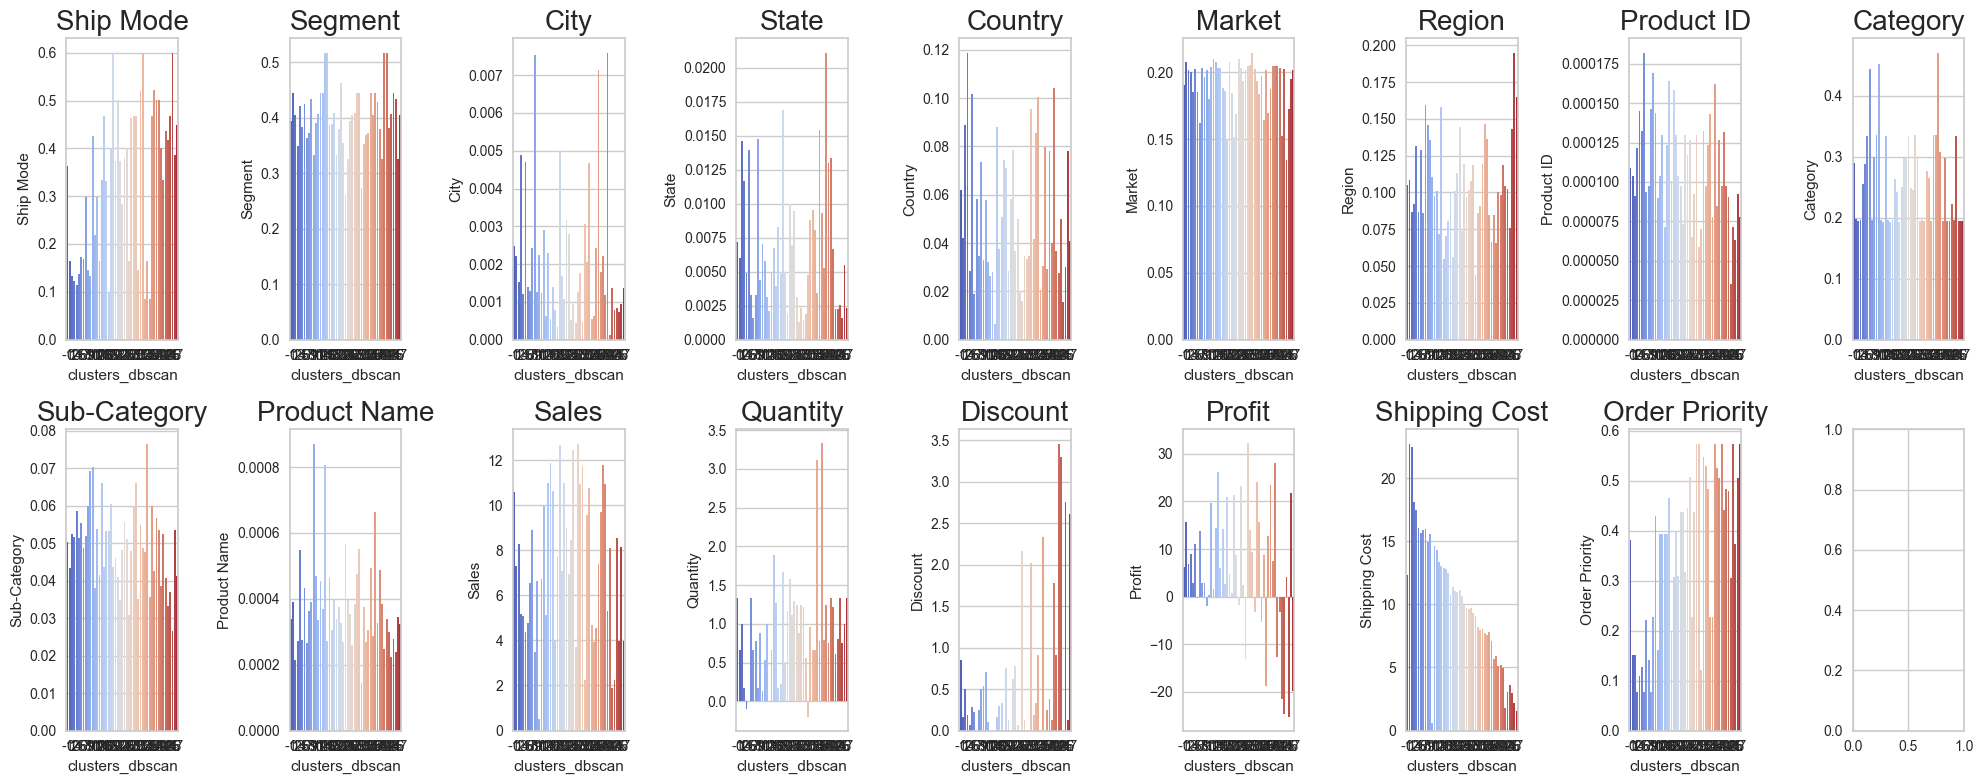

In [5]:
# Eliminar la columna "clusters_kmeans" para el plot
columnas_plot = df.columns.drop(['clusters_dbscan'])

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_dbscan")[columna].mean().reset_index()
   
    sns.barplot(x="clusters_dbscan", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()
plt.show()